In [1]:
# Data based on https://alex.github.io/nyt-2020-election-scraper/ which based on an unofficial API powering the New York Times’ election site.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://alex.github.io/nyt-2020-election-scraper/battleground-state-changes.csv')

In [5]:
df.state.unique()

array(['Alaska (EV: 3)', 'Arizona (EV: 11)', 'Georgia (EV: 16)',
       'North Carolina (EV: 15)', 'Nevada (EV: 6)',
       'Pennsylvania (EV: 20)'], dtype=object)

In [7]:
df.columns

Index(['state', 'timestamp', 'leading_candidate_name',
       'trailing_candidate_name', 'leading_candidate_votes',
       'trailing_candidate_votes', 'vote_differential', 'votes_remaining',
       'new_votes', 'leading_candidate_partition',
       'trailing_candidate_partition', 'precincts_reporting',
       'precincts_total', 'hurdle', 'hurdle_change', 'hurdle_mov_avg'],
      dtype='object')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

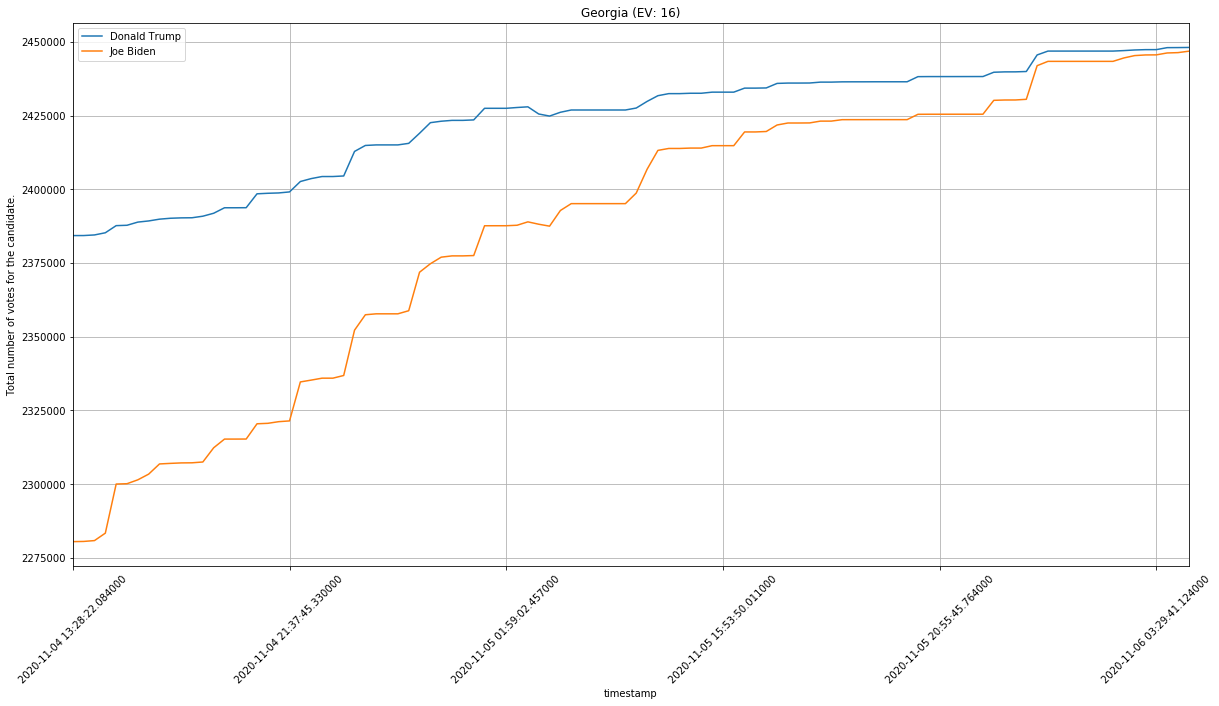

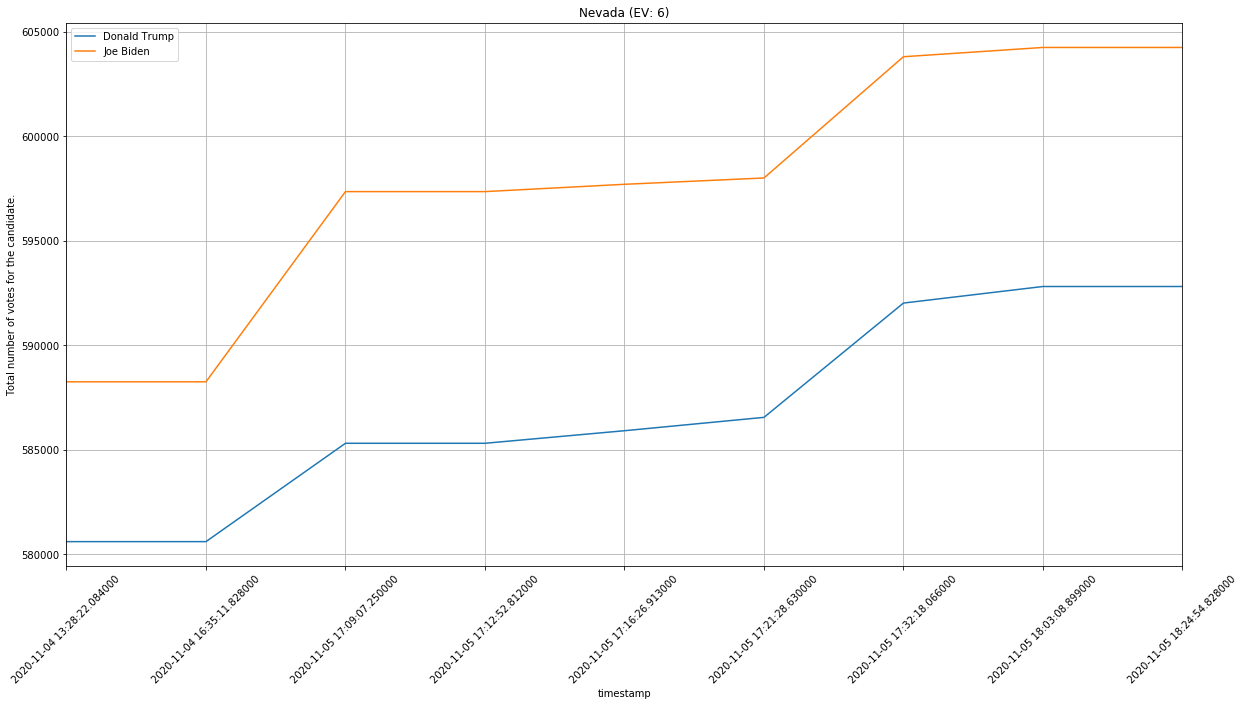

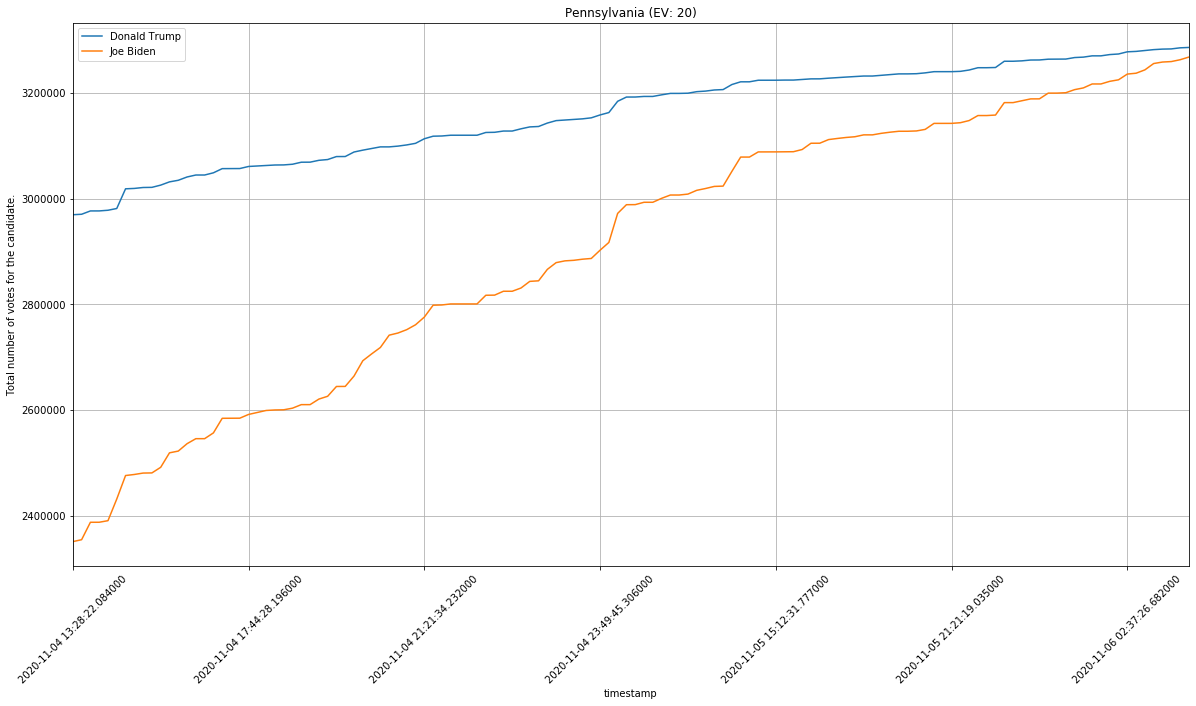

In [37]:
for (state, t) in [('Georgia (EV: 16)', True), ('Nevada (EV: 6)', False), ('Pennsylvania (EV: 20)', True)]:
    ga = df[df['state'] == state]        
    ga.sort_values('timestamp', inplace=True)
    ga['Donald Trump'] = ga['leading_candidate_votes'] if t else ga['trailing_candidate_votes']
    ga['Joe Biden'] = ga['trailing_candidate_votes'] if t else  ga['leading_candidate_votes']
    ga.plot(x='timestamp', y=['Donald Trump', 'Joe Biden'], rot=45, figsize=(20,10), title=state, grid=True)
    plt.ylabel('Total number of votes for the candidate.')